In [6]:
!pip install seaborn
!pip install scikit-learn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [8]:
# Vérifier la présence de valeurs manquantes et les supprimer si nécessaire
df.dropna(subset=['text'], inplace=True)

# Sélectionner les colonnes nécessaires
X_text = df['text']  # Les tweets
y = df['science_related']  # Les labels (scientifique ou non)

# Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()  # Initialisation du vectorizer
X_tfidf = vectorizer.fit_transform(X_text)  # Transformation des tweets en vecteurs TF-IDF

# Afficher la forme de la matrice résultante
print("Taille de la matrice TF-IDF :", X_tfidf.shape)
#----------------------------------------------------------------------
# Conversion de la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un extrait de la matrice TF-IDF
print("Aperçu de la matrice TF-IDF (5 premières lignes) :")
display(tfidf_df.head())  # Utilisation de display() pour bien formater l'affichage dans Jupyter

Taille de la matrice TF-IDF : (1140, 7969)
Aperçu de la matrice TF-IDF (5 premières lignes) :


,000,01,049,07904567432a,093,0cmzimdaje,0hitnsx0c4,0iwaxgdpww,0jlkmseyhp,0oup8eayxh,...,ᴸᴼᵛᴱ,ᴼᴺ,ᴼᴼᴴ,ᵀᴴᴵˢ,ᵞᴼᵁ,ᶜᴴᴬᴿᴬᶜᵀᴱᴿ,逃げ恥,音樂,더쇼,런쥔을_공평하게_대하세요
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:


# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['science_related'], test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)


🔍 Naive Bayes
✅ Accuracy: 0.6930
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.6861    1.0000    0.8138       153
           1     1.0000    0.0667    0.1250        75

    accuracy                         0.6930       228
   macro avg     0.8430    0.5333    0.4694       228
weighted avg     0.7894    0.6930    0.5872       228



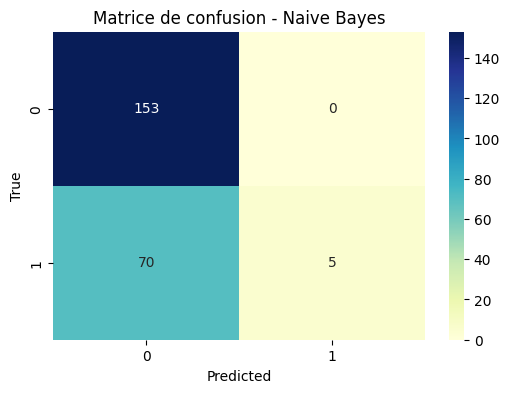


🔍 Decision Tree
✅ Accuracy: 0.7500
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7791    0.8758    0.8246       153
           1     0.6607    0.4933    0.5649        75

    accuracy                         0.7500       228
   macro avg     0.7199    0.6846    0.6948       228
weighted avg     0.7401    0.7500    0.7392       228



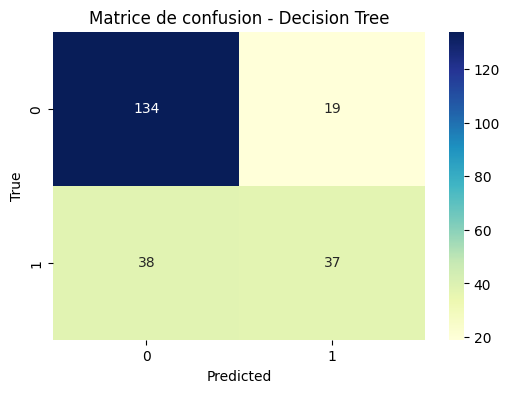


🔍 SVM
✅ Accuracy: 0.8026
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7872    0.9673    0.8680       153
           1     0.8750    0.4667    0.6087        75

    accuracy                         0.8026       228
   macro avg     0.8311    0.7170    0.7384       228
weighted avg     0.8161    0.8026    0.7827       228



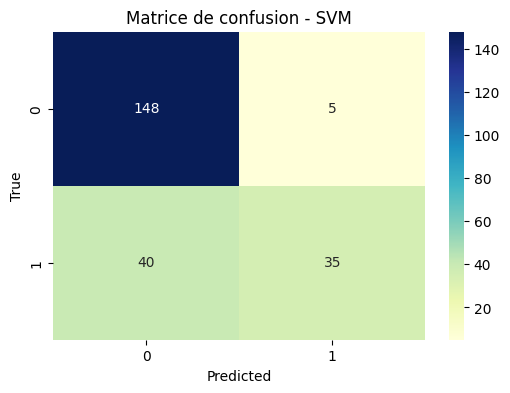


🔍 K-NN
✅ Accuracy: 0.7456
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7811    0.8627    0.8199       153
           1     0.6441    0.5067    0.5672        75

    accuracy                         0.7456       228
   macro avg     0.7126    0.6847    0.6935       228
weighted avg     0.7360    0.7456    0.7367       228



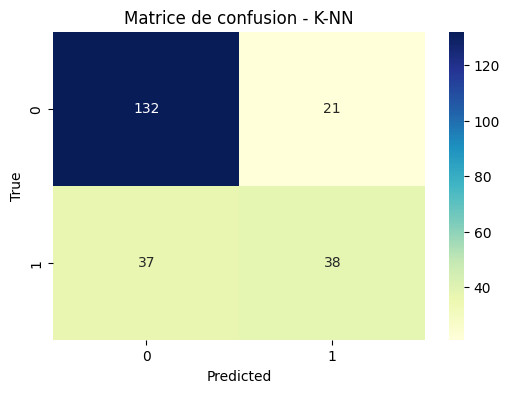


🔍 Random Forest
✅ Accuracy: 0.7544
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7321    1.0000    0.8453       153
           1     1.0000    0.2533    0.4043        75

    accuracy                         0.7544       228
   macro avg     0.8660    0.6267    0.6248       228
weighted avg     0.8202    0.7544    0.7002       228



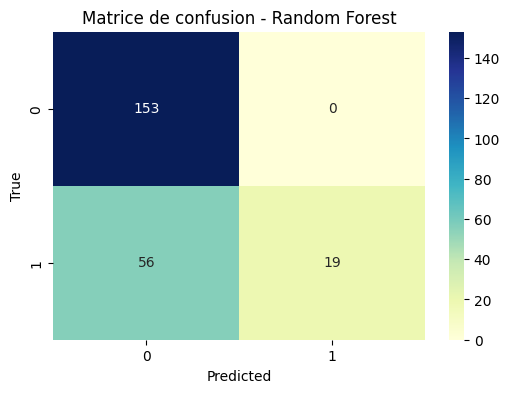


🔍 XGBoost
✅ Accuracy: 0.8158
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8323    0.9085    0.8688       153
           1     0.7705    0.6267    0.6912        75

    accuracy                         0.8158       228
   macro avg     0.8014    0.7676    0.7800       228
weighted avg     0.8120    0.8158    0.8103       228



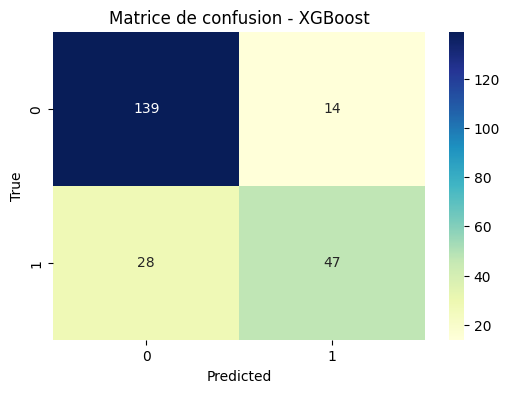


🔍 Neural Network - MLP
✅ Accuracy: 0.7939
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8011    0.9216    0.8571       153
           1     0.7692    0.5333    0.6299        75

    accuracy                         0.7939       228
   macro avg     0.7852    0.7275    0.7435       228
weighted avg     0.7906    0.7939    0.7824       228



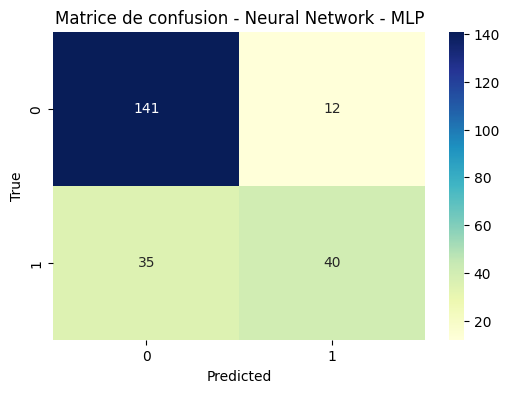

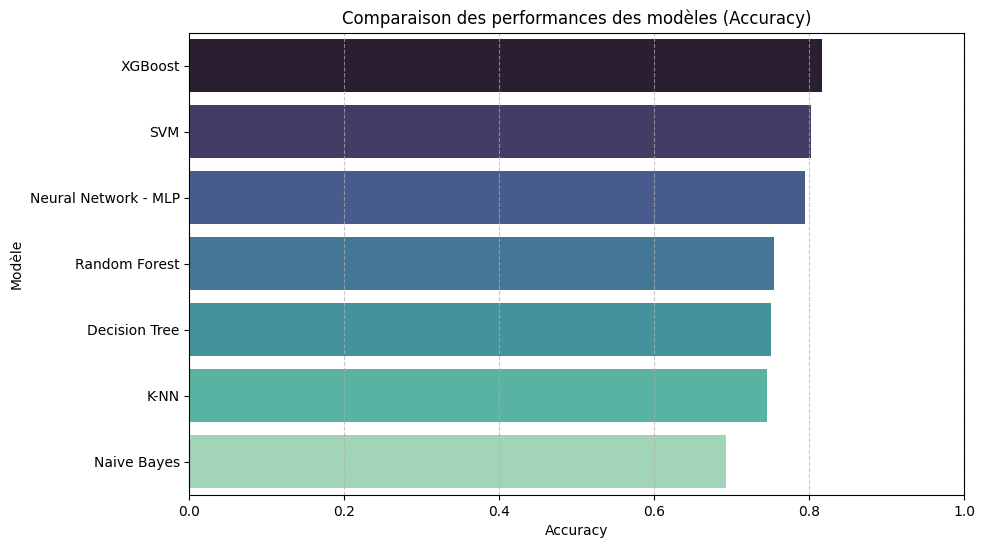

In [10]:
# Modèles de base
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier




def plot_confusion_matrix(y_test, y_pred, labels, title):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Matrice de confusion - {title}")
    plt.show()
    
models = {
    "Naive Bayes": MultinomialNB(),
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": LinearSVC(),
    "K-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network - MLP": MLPClassifier()
}

results = []

# ⚙️ Entraînement, prédiction, évaluation
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"✅ Accuracy: {acc:.4f}")
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    plot_confusion_matrix(y_test, y_pred, labels=np.unique(y), title=name)

# 📊 Comparaison des modèles avec diagramme en barres
results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy"])
results_df = results_df.sort_values("Accuracy", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy", y="Modèle", palette="mako")
plt.title("Comparaison des performances des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()